
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - polynomial regression <br>
<font color=696880 size=4>
Ali Rahimi Akbar

____

#Personal Data

In [9]:
import math

# Set your student number and name
student_number = '401106266'
Name = 'Mahdi'  
Last_Name = 'AliNejad'

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.


## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-3 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [10]:
import numpy as np


def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = np.random.uniform(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    Y = 0.1 * X ** 6 - 2 * X ** 3 + 7 * X ** 2 - 9 * X + 3 + noise
    return X, Y

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 4 to 6.**

In [11]:
from sklearn.model_selection import train_test_split

training_data = generate_dataset(-3, -1, 1000)
test_data_same_range = generate_dataset(-3, -1, 1000)
test_data_different_range = generate_dataset(4, 6, 1000)


## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 12. You can't use sklearn library for this section

In [12]:
def make_x_vector_with_index(X, dg, j):
    return make_x_vector(X[j], dg)


def make_x_vector(x, dg):
    x_vec = np.ones((1, dg))
    for k in range(1, dg):
        x_vec[0][k] = x_vec[0][k - 1] * x
    return x_vec[0]


def make_matrix_x(X, degree):
    dg = degree + 1
    x_matrix = np.zeros((len(X), dg))
    for j in range(len(X)):
        x_vec = make_x_vector_with_index(X, dg, j)
        x_matrix[j] = x_vec
    return x_matrix


class PolynomialRegression:

    def __init__(self, degree, learning_rate=0.01, iterations=500, clip_value=1.0):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = [np.random.uniform(-1, 1) for _ in range(degree + 1)]
        self.clip_value = clip_value
        # initialize  model

    def fit(self, X, Y):
        for _ in range(self.iterations):
            predicted_Y = np.dot(x_matrix, self.weights)
            gradients = (1 / len(Y)) * np.dot(x_matrix.T, (predicted_Y - Y))
            gradients = np.clip(gradients, -self.clip_value, self.clip_value)
            self.weights -= self.learning_rate * gradients

        # input : X and Y for fit model with gradient descent and return Self
        return self

    def predict(self, X):
        return np.dot(X, self.weights.T)
        # Get X and return predicted value from model


## 4. Model Evaluation (15 Points)
Evaluate the models on both train and test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.

In [13]:
from sklearn.metrics import mean_squared_error


def evaluate_models(models, X_test, y_test):
    return mean_squared_error(y_test, models.predict(X_test))

## 5. Plotting your predicted polynomial function

plot your predicted function at degree 5 and 6 and 7 and the base function from question in range -3 to -1.

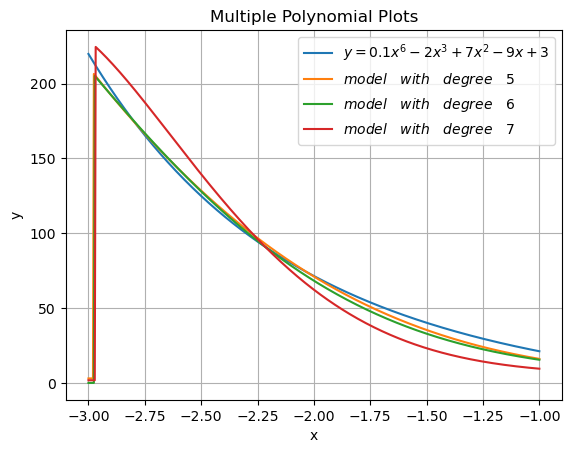

In [14]:
import matplotlib.pyplot as plt


def normalize(x_matrix):
    for i in range(len(x_matrix[0])):
        mean = np.mean(x_matrix[:][i])
        sd = np.std(x_matrix[:][i])
        x_matrix[:][i] = (x_matrix[:][i] - mean) / sd


def poly_to_plot(x):
    return 0.1 * x ** 6 - 2 * x ** 3 + 7 * x ** 2 - 9 * x + 3


x = np.linspace(-3, -1, 500)
y = poly_to_plot(x)

pr5 = PolynomialRegression(5)
x_matrix = make_matrix_x(x, 5)
normalize(x_matrix)
pr5.fit(x_matrix, y)
y_pred5 = pr5.predict(x_matrix)

pr6 = PolynomialRegression(6)
x_matrix = make_matrix_x(x, 6)


normalize(x_matrix)
pr6.fit(x_matrix, y)
y_pred6 = pr6.predict(x_matrix)

pr7 = PolynomialRegression(7)
x_matrix = make_matrix_x(x, 7)
normalize(x_matrix)
pr7.fit(x_matrix, y)
y_pred7 = pr7.predict(x_matrix)

plt.plot(x, y, label='$y = 0.1x^6 - 2x^3 + 7x^2 - 9x + 3$')
plt.plot(x, y_pred5, label='$model\quad with\quad degree\quad 5$')
plt.plot(x, y_pred6, label='$model\quad with\quad degree\quad 6$')
plt.plot(x, y_pred7, label='$model\quad with\quad degree\quad 7$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multiple Polynomial Plots')
plt.legend()
plt.grid(True)
plt.show()


## 6. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and test sets based on the model degree varying from 2 to 12.

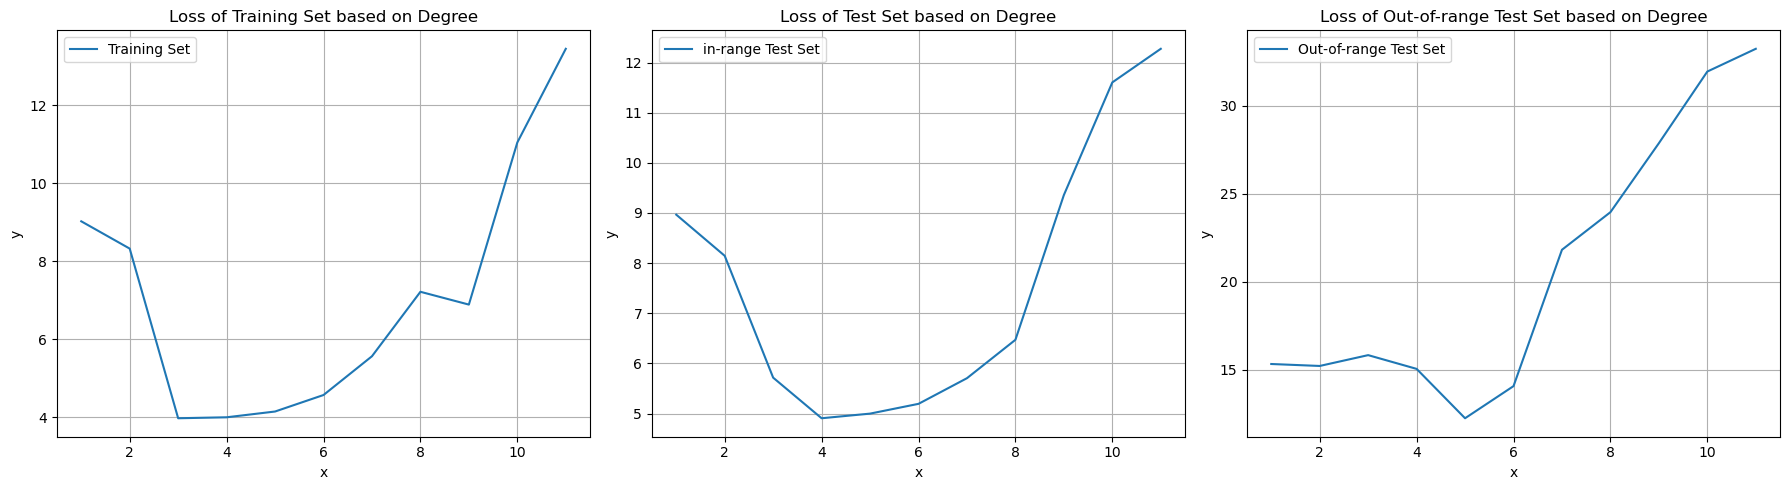

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x_axis = range(1,12)
y1 = []
for i in range(1,12):
    model = PolynomialRegression(i)
    x_matrix = make_matrix_x(training_data[0], i)
    normalize(x_matrix)
    model.fit(x_matrix, training_data[1])
    log_error = math.log(evaluate_models(model, x_matrix, training_data[1]))
    y1.append(log_error)
axes[0].plot(x_axis, y1, label='Training Set')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Loss of Training Set based on Degree')
axes[0].legend()
axes[0].grid(True)

x_axis = range(1,12)
y2 = []
for i in range(1,12):
    model = PolynomialRegression(i)
    x_matrix = make_matrix_x(training_data[0], i)
    normalize(x_matrix)
    model.fit(x_matrix, training_data[1])
    x_matrix = make_matrix_x(test_data_same_range[0], i)
    normalize(x_matrix)
    y2.append(math.log(evaluate_models(model, x_matrix, test_data_same_range[1])))
axes[1].plot(x_axis, y2, label='in-range Test Set')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Loss of Test Set based on Degree')
axes[1].legend()
axes[1].grid(True)

x_axis = range(1,12)
y3 = []
for i in range(1,12):
    model = PolynomialRegression(i)
    x_matrix = make_matrix_x(training_data[0], i)
    normalize(x_matrix)
    model.fit(x_matrix, training_data[1])
    x_matrix = make_matrix_x(test_data_different_range[0], i)
    normalize(x_matrix)
    y3.append(math.log(evaluate_models(model, x_matrix, test_data_different_range[1])))
axes[2].plot(x_axis, y3, label='Out-of-range Test Set')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].set_title('Loss of Out-of-range Test Set based on Degree')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()

plt.show()

## Conclusion (10 Points)
With comparing the loss of **training set and the test set** specially in higher degrees, what we can conclude about the bias - variance trade off? bias means approximating a problem with a simpler model which is called underfitting and variance is the term for being to sensitive to new things and a small change could cause a big difference which is called overfitting the best degree for our regression is a hyperparameter and its value has great effect on the outcome, for example here we have a great model at about degree 3 to 5 but the lower degrees lead to underfit and higher degrees lead to overfit.